In [1]:
%pylab
%matplotlib notebook

Using matplotlib backend: <object object at 0x7f9a5fa5ed60>
Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
a = pd.read_csv('tns_2023un_2459963.125990_UH88_SNIFS_SCAT.dat',\
                sep=' ', names=['wave','flux','fluexerr'], comment='#')
b = pd.read_csv('tns_2023wl_2023-01-20_07-36-09_SOAR_Goodman_UCSC.flm',
                sep=' ', names=['wave','flux','fluexerr'], comment='#')
c = pd.read_csv('tns_2023yv_2023-01-22_11-28-59.764590_P60_SEDM_ZTF.ascii',
                sep=' ', names=['wave','flux','fluexerr'], comment='#')

<IPython.core.display.Javascript object>


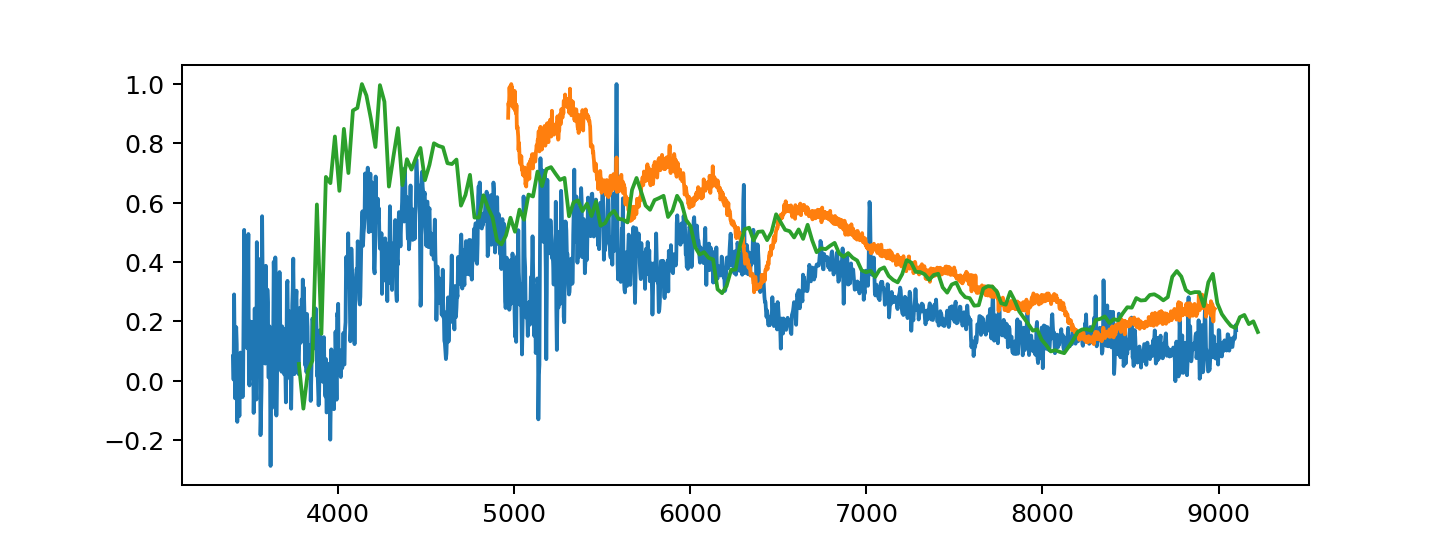

In [4]:
fig = figure(figsize=(8,3))
ax = fig.add_subplot(1,1,1)
ax.plot(a['wave'], a['flux']/a['flux'].max())
ax.plot(b['wave'], b['flux']/b['flux'].max())
ax.plot(c['wave'], c['flux']/c['flux'].max());

In [5]:
import astropy
import astropy.io.fits
import astropy.visualization as av

In [6]:
d = astropy.io.fits.open('idxr27030_drc.fits')

In [7]:
d.info()

Filename: idxr27030_drc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     888   ()      
  1  SCI           1 ImageHDU        96   (4129, 4477)   float32   
  2  WHT           1 ImageHDU        45   (4129, 4477)   float32   
  3  CTX           1 ImageHDU        40   (4129, 4477)   int32   
  4  HDRTAB        1 BinTableHDU    559   6R x 275C   [9A, 3A, K, D, D, D, D, D, D, D, D, D, D, D, D, K, 11A, 9A, 7A, 18A, 4A, D, D, D, D, 3A, D, D, D, D, D, D, D, D, D, D, D, D, K, K, 8A, 23A, D, D, D, D, K, K, 8A, 23A, 9A, 18A, 4A, K, D, D, D, K, K, K, K, 23A, D, D, D, D, K, K, 4A, 3A, 4A, L, D, D, D, 23A, 1A, K, D, D, D, 4A, 1A, 12A, 12A, 8A, 23A, D, D, 10A, 10A, D, D, D, 4A, 3A, 3A, 4A, 8A, 7A, D, K, D, 6A, 9A, 8A, D, D, 4A, 18A, 3A, K, 5A, 3A, D, 10A, 8A, 8A, 23A, D, D, D, 3A, 1A, D, 23A, D, D, D, 3A, L, 1A, 4A, D, 3A, 6A, D, D, D, D, D, 23A, D, D, D, D, D, 1A, K, K, K, K, D, 3A, K, D, 5A, 7A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D,

In [8]:
img = d[1].data

<IPython.core.display.Javascript object>


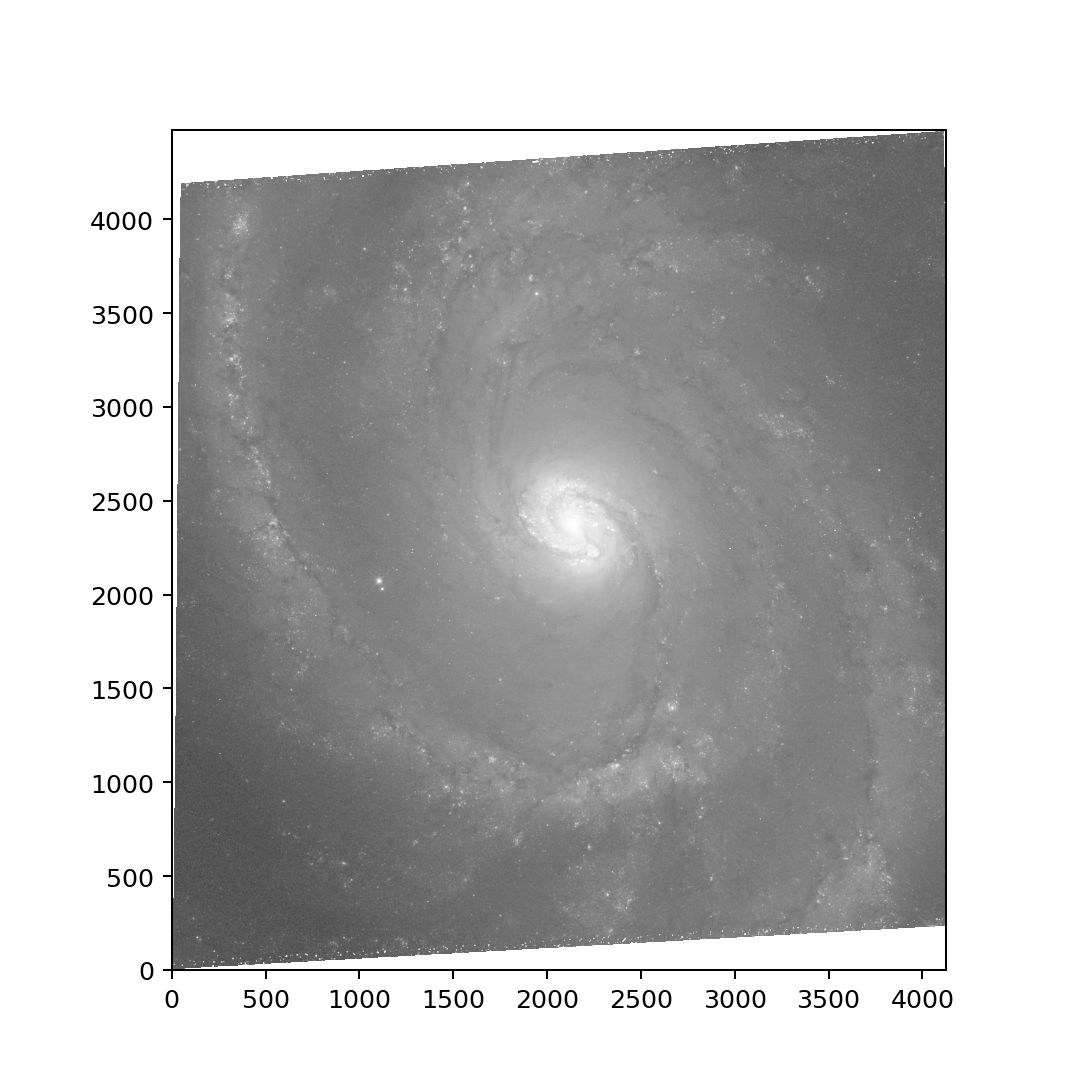

In [9]:
fig2 = figure(figsize=(6,6))
ax2 = fig2.add_subplot(1,1,1)
im, norm = av.imshow_norm(img, ax=ax2, interval=av.ZScaleInterval(krej=0.5), stretch=av.LogStretch(),\
               origin='lower',cmap='Greys_r')